<a href="https://colab.research.google.com/github/Samarjeet-singh-chhabra/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/COLAB_%7C_CP_4_%7C_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_%7C_SAMARJEET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX MOVIES AND TV SHOWS CLUSTERING**






This project involves an analysis of a dataset containing information on movies and TV shows available on Netflix as of 2019. Using unsupervised machine learning techniques, such as clustering algorithms, the project aims to identify patterns and groupings within the data to gain insights into the trends and characteristics of content on Netflix. By exploring the data in this way, the project can provide valuable insights into user preferences and content trends, which can be used to improve the user experience and drive business growth. The project is designed to be a standalone analysis of the Netflix dataset and can serve as a foundation for future research in the field of content analysis and unsupervised machine learning.


##### **Project Type**    - Unsupervised ML


## **Team Spaceneedle**


##### **Team Member 1 -**Devarshi Dwivedi
##### **Team Member 2 -**Jay Pardeshi
##### **Team Member 3 -**Priyadarshini Gaikwad
##### **Team Member 4 -**Samarjeet Singh

# **UNDERSTANDING BUSINESS PROBLEM**

The business problem at the heart of this unsupervised machine learning project is to gain insights into the trends and patterns of content on Netflix, and to use those insights to improve the user experience and drive business growth. The challenge for Netflix is to make sense of the vast amount of content in their library and to provide their users with a personalized and engaging viewing experience. By applying unsupervised machine learning techniques such as clustering to the dataset, the company can identify meaningful patterns and groupings within the data, which can then be used to inform decisions about content creation, marketing, and user interface design. For instance, Netflix can use these insights to promote new releases to users who have previously watched similar titles or to recommend content to users who have shown a preference for certain genres. Ultimately, by leveraging the power of unsupervised machine learning, Netflix can gain a deeper understanding of their content library and their users' preferences, and use this knowledge to drive business growth and customer satisfaction.

# **PROJECT SUMMARY**

Netflix, Inc. is an American subscription video on-demand over-the-top streaming service and production company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

For further details, visit [Netflix Help Center](https://help.netflix.com/en/node/412)

We will be exploring the dataset further to draw insights.

# **PROBLEM STATEMENT**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **TASKS TO PERFORM**

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features



# **DATASET DESCRIPTION**


* show_id : Unique ID for every Movie / Tv Show

* type : Identifier - A Movie or TV Show

* title : Title of the Movie / Tv Show

* director : Director of the Movie

* cast : Actors involved in the movie / show

* country : Country where the movie / show was produced

* date_added : Date it was added on Netflix

* release_year : Actual Releaseyear of the movie / show

* rating : TV Rating of the movie / show

* duration : Total Duration - in minutes or number of seasons

* listed_in : Genere

* description: The Summary description

# **INITIALIZING**

## Importing Libraries and Modules.

In [1]:
import pandas as pd

import numpy as np
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV

from sklearn import metrics

from sklearn.metrics import r2_score, log_loss, mean_squared_error, accuracy_score, mean_absolute_error

from sklearn.pipeline import make_pipeline

from scipy.stats import skew

pd.options.mode.chained_assignment = None  # default='warn'

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Adding Dataset.

In [2]:
# Adding Data set throught link.
url = "https://drive.google.com/file/d/1raIr2HPG_aI-fbu7qk_rRRTPczpl7Fvh/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
orignal_df =  pd.read_csv(url,  encoding= 'unicode_escape')


In [3]:
# Creating a copy, for working on it without harming the orignal dataset.
df = orignal_df.copy()


# **DATA OVERVIEW**

In [4]:
# checking top 5 Rows or instances.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# checking last 5 Rows or instances.
df.tail()      

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# checking total rows and columns ( Rows, Columns).
df.shape

(7787, 12)

In [7]:
# checking basic information of all columns such as datatype, total number null values present, memory usage etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# checking description of all data types columns.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"RaÃºl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking for unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

# **CLEANING THE DATASET**


## Null values check




In [14]:
# Cheking for null values 
df.isna().sum(axis = 0)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

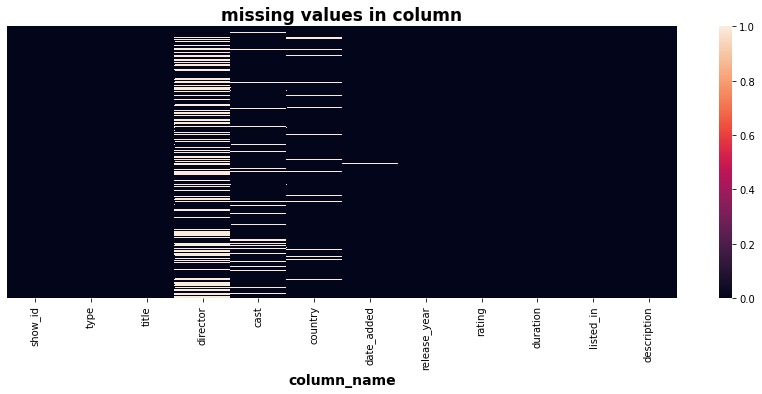

In [15]:
# Checking missing values
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

Some insights:-
1. There are total 7787 rows and 12 columns in this dataset. 
2.  All columns are of object data type except the release_year which is of int type.
3.  There are no duplicate value in this data set but there are many null values present in this dataset 
4.  Columns with null values are director, cast, country, date_added and rating

## Null Values Treatment

In [16]:
#Replacing missing values in 'director' column with Not Mention
df['director'].replace(np.nan, 'Not Mention', inplace = True)

#Replacing missing values in 'cast' column with Not Mention
df['cast'].replace(np.nan, 'Not Mention', inplace = True)

#Replacing missing values in 'country' column with mode
df['country']= df['country'].fillna(df['country'].mode()[0])

#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the null values in 'date_added'
df = df[df['date_added'].notna()]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


In [18]:
# Converting into a date-time format
df['date_added'] = pd.to_datetime(df['date_added'])

# Adding new column year added to get year in which movie is added to netflix
df['year_added'] = df['date_added'].dt.year
df['year_added'].astype(int)


0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7777, dtype: int64

In [19]:
# Renaming the ‘listed_in’ feature to the genre for easy use.
df = df.rename(columns={"listed_in":"genere"})
df['genere'] = df['genere'].apply(lambda x: x.split(",")[0])


In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genere,description,year_added
0,s1,TV Show,3%,Not Mention,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  genere        7777 non-null   object        
 11  description   7777 non-null   object        
 12  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 850.6+ KB


## Duplicate values check

In [23]:
# Checking for duplicate values
len(df[df.duplicated()])

0

Some insights:-
1. There are no duplicate instances.

In [24]:
df.shape[0]

7777

## Unique Values for each variable.

In [25]:
# Check Unique Values for each variable.
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's7785', 's7786', 's7787'], dtype=object)

In [26]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [27]:
df['title'].unique()

array(['3%', '7:19', '23:59', ..., 'Zulu Man in Japan',
       "Zumbo's Just Desserts", "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"],
      dtype=object)

In [28]:
df['director'].unique()

array(['Not Mention', 'Jorge Michel Grau', 'Gilbert Chan', ...,
       'Josef Fares', 'Mozez Singh', 'Sam Dunn'], dtype=object)

In [29]:
df['cast'].unique()

array(['JoÃ£o Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, ZezÃ© Motta, Celso Frateschi',
       'DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=object)

In [30]:
df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, United St

In [31]:
df['date_added'].unique()

array(['2020-08-14T00:00:00.000000000', '2016-12-23T00:00:00.000000000',
       '2018-12-20T00:00:00.000000000', ...,
       '2018-12-06T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [32]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [33]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [34]:
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [36]:
df['genere'].unique()

array(['International TV Shows', 'Dramas', 'Horror Movies',
       'Action & Adventure', 'Crime TV Shows', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Docuseries', 'Movies',
       'British TV Shows', 'International Movies', 'Sci-Fi & Fantasy',
       "Kids' TV", 'Children & Family Movies', 'TV Shows',
       'Classic Movies', 'Thrillers', 'Stand-Up Comedy & Talk Shows',
       'Stand-Up Comedy', 'Anime Features', 'Music & Musicals',
       'TV Dramas', 'TV Horror', 'TV Action & Adventure',
       'Classic & Cult TV', 'Romantic TV Shows', 'Cult Movies',
       'TV Sci-Fi & Fantasy', 'Romantic Movies',
       'Spanish-Language TV Shows', 'LGBTQ Movies'], dtype=object)

In [37]:
df['description'].unique()

array(['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
       'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
       "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
       ...,
       "In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture.",
       'Dessert wizard Adriano Zumbo looks for the next â\x80\x9cWilly Wonkaâ\x80\x9d in this tense competition that finds skilled amateurs competing for a $100,000 prize.',
       'This documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.'],
      dtype=object)